In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, f1_score

spy_df = pd.read_csv("../../data/finance/csv_files/monthly_spy_data.csv")
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df['year'] = spy_df['Date'].dt.year
spy_df['month'] = spy_df['Date'].dt.month
spy_df_extracted = spy_df[['year', 'month', 'Close']]

crime_df = pd.read_csv("../../data/crime/monthly_crime.csv")
total_crime_extracted = crime_df[['year', 'month', 'violent_crime', 'homicide', 'robbery', 'aggravated_assault', 'property_crime', 'burglary','motor_vehicle_theft','rape']]

merged_df_spy = pd.merge(total_crime_extracted, spy_df_extracted, on=['year', 'month'], how='inner')

scaler = MinMaxScaler()
features = merged_df_spy.iloc[:, :-1]
features_scaled = scaler.fit_transform(features)

normalizer = Normalizer()
target = merged_df_spy.iloc[:, -1:]
target = normalizer.fit_transform(target)

In [24]:
features_scaled

array([[0.        , 0.81818182, 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       [0.        , 0.90909091, 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       [0.        , 1.        , 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       ...,
       [1.        , 0.81818182, 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938],
       [1.        , 0.90909091, 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938],
       [1.        , 1.        , 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features_scaled)
features_scaled = pca.transform(features_scaled)

In [21]:
features_scaled

array([[-0.99607886, -0.290281  ],
       [-0.99695472, -0.29267681],
       [-0.99783059, -0.29507263],
       [-1.03905477, -0.23569324],
       [-1.03993064, -0.23808905],
       [-1.0408065 , -0.24048487],
       [-1.04168237, -0.24288068],
       [-1.04255823, -0.2452765 ],
       [-1.0434341 , -0.24767231],
       [-1.04430997, -0.25006813],
       [-1.04518583, -0.25246394],
       [-1.0460617 , -0.25485976],
       [-1.04693756, -0.25725557],
       [-1.04781343, -0.25965139],
       [-1.04868929, -0.2620472 ],
       [-0.96064001, -0.24115885],
       [-0.96151587, -0.24355467],
       [-0.96239174, -0.24595048],
       [-0.9632676 , -0.2483463 ],
       [-0.96414347, -0.25074211],
       [-0.96501933, -0.25313793],
       [-0.9658952 , -0.25553374],
       [-0.96677106, -0.25792956],
       [-0.96764693, -0.26032537],
       [-0.96852279, -0.26272119],
       [-0.96939866, -0.265117  ],
       [-0.97027452, -0.26751282],
       [-0.85407165, -0.27878481],
       [-0.85494751,

In [18]:
merged_df_spy.head()

,year,month,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,motor_vehicle_theft,rape,Close
0,2005,10,4457,53,1337,2763,32611,6908,3961,302,118.763750
1,2005,11,4457,53,1337,2763,32611,6908,3961,302,124.033809
2,2005,12,4457,53,1337,2763,32611,6908,3961,302,126.317143
3,2006,1,4599,55,1439,2801,32114,7035,3840,302,127.809000
4,2006,2,4599,55,1439,2801,32114,7035,3840,302,127.767370


In [9]:
len(merged_df_spy)

207

/var/folders/3m/860dncss64lbz0yf839zmg640000gn/T/ipykernel_57363/3860582342.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features_scaled[:, 0], features_scaled[:, 1], target, cmap='plasma')


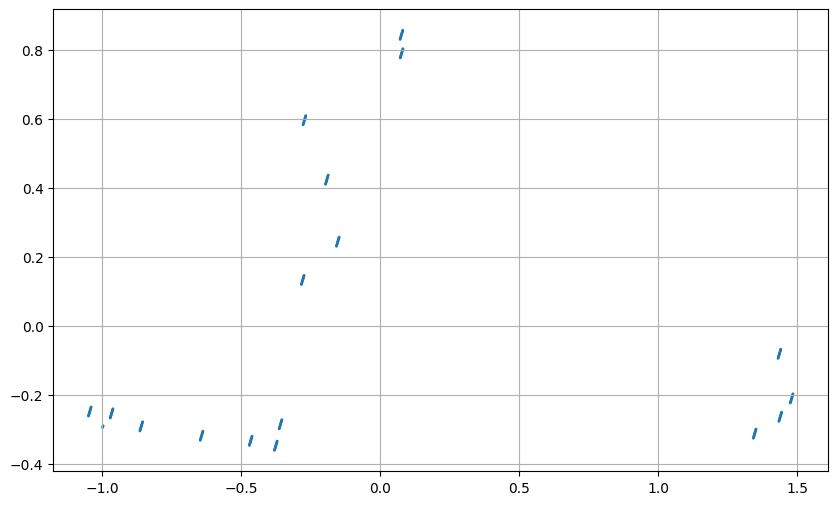

In [15]:
import matplotlib.pyplot as plt

# Figure
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], target, cmap='plasma')
plt.grid(True)
plt.show()

In [19]:
from sklearn.manifold import TSNE
# Initialize the t-SNE model
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit the model to the data
low_dim_data = tsne_model.fit_transform(features_scaled)

# Visualize the low-dimensional data
import matplotlib.pyplot as plt

plt.scatter(low_dim_data)
plt.show()

TypeError: matplotlib.pyplot.scatter() argument after ** must be a mapping, not numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2)

# # Define and fit the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)